<a href="https://colab.research.google.com/github/arsi-87/ml-final-project/blob/main/notebook/AS_ML_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finalni Projekat

### Cilj projekta
Cilj ovog projekta je razvijanje modela masinskog ucenja koji ce automatski predlagati odgovarajucu kategoriju za svaki novi proizvod na osnovu njegovog naziva.
Ovaj model treba da omoguci da svaki novi artikal dobije odgovarajucu kategoriju,sto ubrzava rad citavog tima,olaksava pretragu i unapredjuje iskustvo korisnika na sajtu.

### Ucitavanje i provera podataka
Pre nego sto krenemo u analizu,prvo cemo ucitati podatke direktno sa naseg GitHuba-a i pogledati strukuturu podataka.
U ovom koraku cemo:
- Ucitati csv fajl sa GitHub-a
- Prikazati koliko ima redova
- Prikazati prvih 5 redova
- Videti tipove podataka i osnovne podatke kolona

In [141]:
import pandas as pd

url = "https://raw.githubusercontent.com/arsi-87/ml-final-project/main/data/products.csv"

df = pd.read_csv(url)

print("Dataset shape(rows, columns):", df.shape)

print("\nFirst 5 rows:")
display(df.head(50))

print("\nDataset info:")
df.info()

#Uklanjam razmake prazna polja u imenu kolona
df.columns = df.columns.str.strip()

#Uklanjam _ iz imena kolone 'Product Code'
df.rename(columns={'_Product Code': 'Product Code'}, inplace=True)

#Izbacujemo proizvode bez naslova
df = df[df["Product Title"].notna()]


Dataset shape(rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023
5,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,Mobile Phones,SB-2202-CH,3444.0,1.6,11/27/2022
6,7,apple iphone 8 plus 64 gb space grey,7,Mobile Phones,QJ-3229-QP,3171.0,1.2,3/29/2022
7,8,apple iphone 8 plus 64gb space grey,8,Mobile Phones,ES-1396-OR,2919.0,4.5,5/21/2024
8,9,apple iphone 8 plus 64gb space grey,9,Mobile Phones,VU-2032-FY,130.0,3.4,5/11/2022
9,10,apple iphone 8 plus 64gb space grey,10,Mobile Phones,WI-6394-GG,1685.0,3.8,2/9/2024



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


### Provera nedostajucih vrednosti
Nedostajuce vrednosti predstavljaju veliki problem za model masinskog ucenja,jer model ne moze se istrenira pravilno i moze da da pogrsne rezultata. Zato cemo u ovom kodu prebrojati sve nedostajuce vrednosti u kolonama

In [142]:
print(df.isna().sum())


product ID           0
Product Title        0
Merchant ID          0
Category Label      43
Product Code        94
Number_of_Views     14
Merchant Rating    170
Listing Date        58
dtype: int64


## Analiza i vizualizacija kolone 'Category Label'
U ovom delu cemo vise paznje posvetiti koloni 'Category Label',jer je ona u ovom skupu podataka najvaznija jer sadrzi vrednosti na osnovu kojih ce model predvidjati rezultate.


In [143]:
#Proveravamo koje vrednosti postoje u 'Category Label'

category_count = df['Category Label'].value_counts()
print(category_count)

print("Data type of category label column:", df['Category Label'].dtype)


Category Label
Fridge Freezers     5470
Washing Machines    4015
Mobile Phones       4002
CPUs                3747
TVs                 3541
Fridges             3436
Dishwashers         3405
Digital Cameras     2689
Microwaves          2328
Freezers            2201
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64
Data type of category label column: object


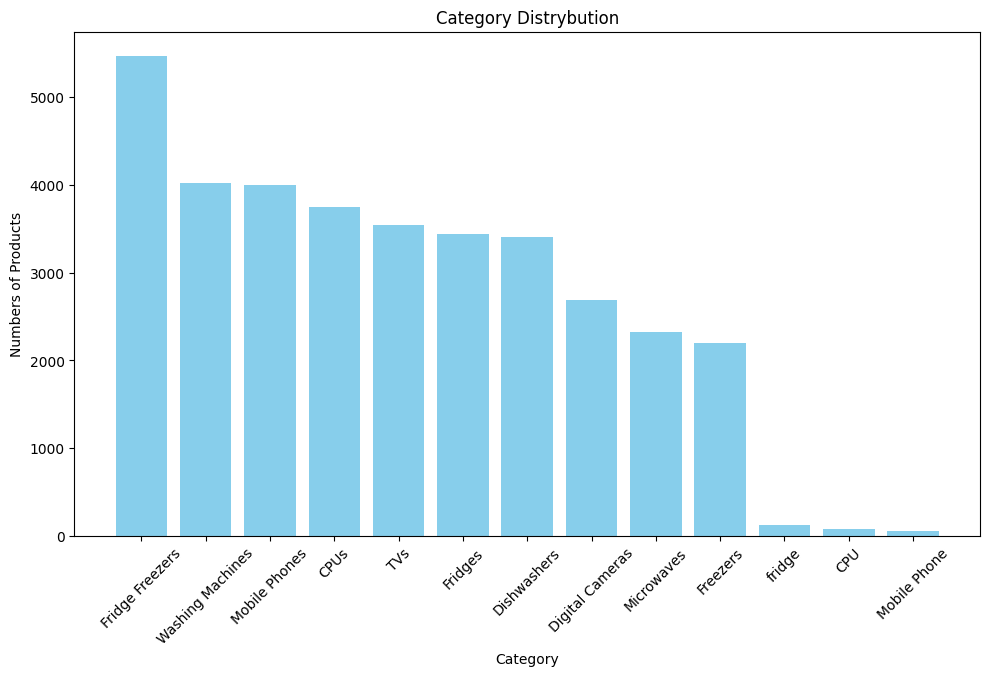

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.bar(category_count.index, category_count.values, color= "skyblue")
plt.title("Category Distrybution")
plt.xlabel("Category")
plt.ylabel("Numbers of Products")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Brisanje nedostajucih vrednosti
U ovm delu cemo obrisati sve nedostajuce vrednosti koje se nalaze u nasem skupu podataka

In [145]:
df = df.dropna()

print("Missing values afteer per column:\n")
print(df.isna().sum())
print("Number of rows:", df.shape)


Missing values afteer per column:

product ID         0
Product Title      0
Merchant ID        0
Category Label     0
Product Code       0
Number_of_Views    0
Merchant Rating    0
Listing Date       0
dtype: int64
Number of rows: (34760, 8)


### Standardizacija kolona
Sada cemo se pozabaviti standardizacijom kolone 'Category Label' jer sam primetio da se vrednosti pojavljuju u razlicitim oblicima,pa cemo sve to spojiti u jednu klasu Ovo ce nam pojednostaviti model i smanjiti greske prilikom treniranja.
- Fridges,fridge ---> Fridges
- Mobile Phones, Mobile Phone ---> Mobile Phones
- CPU, CPUs ---> CPU

In [146]:
#Pretvaramo sve vrednosti u kolni u mala slova
df['Category Label'] = (df['Category Label'].astype(str).str.strip())

df['Category Label'] = df['Category Label'].replace({
   "fridge": "Fridges",
   "CPUs": "CPU",
   "Mobile Phone": "Mobile Phones"
})
print(df['Category Label'].value_counts())


Category Label
Fridge Freezers     5424
Mobile Phones       4023
Washing Machines    3971
CPU                 3792
Fridges             3524
TVs                 3502
Dishwashers         3374
Digital Cameras     2661
Microwaves          2307
Freezers            2182
Name: count, dtype: int64


### Tipovi kolona
Sada cemo proveriti kojih su tipova kolone. Promenicemo tip kolone ako se ispostavi da je pogresan

In [147]:
print(df.dtypes)

#Menjam tip kolone iz object ---> datetime
df['Listing Date'] = pd.to_datetime(df['Listing Date'])


product ID           int64
Product Title       object
Merchant ID          int64
Category Label      object
Product Code        object
Number_of_Views    float64
Merchant Rating    float64
Listing Date        object
dtype: object


### Ciscenje tabela - Uklanjamo nepotrebne kolone
Na osnovu analiziranja datih kolona,zakljucio sam da zadrzim samo kolone 'Product Title' i 'Category Label'. One su najrelevantnije za treniranje modela kako bi dobili sto tacnije predikcije kategorija.
Sve ostale kolone cemo obrisati jer nemaju analiticku vrednost za nasu predikciju kategorija. Ako ih ostavimo,samo dodajemo sum modelu i komplikujemo kod.
- Product ID – jedinstveni identifikator
- Merchant ID – prodavac
- Product Code – interni kod
- Number of Views – broj pregleda
- Merchant Rating – ocena prodavca
- Listing Date – datum postavljanja

In [148]:
print(df.columns)

df = df.drop(columns=['product ID', 'Merchant ID', 'Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date'])

print("Remaining columns:")
print(df.columns.tolist())

Index(['product ID', 'Product Title', 'Merchant ID', 'Category Label',
       'Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date'],
      dtype='object')
Remaining columns:
['Product Title', 'Category Label']


### Pravimo dve nove kolone
Pravimo kolonu *title_lenght* da proverimo koliko ima karaktera i *title_words* broj reci u naslovu proizvoda. Provericemo da li ove karakteristike mogu uticati na poboljsanje tacnosti modela.

In [149]:
df["title_length"] = df["Product Title"].str.len()
df["title_words"] = df["Product Title"].str.split().apply(len)

df[["title_length", "title_words"]].describe()

,title_length,title_words
count,34760.000000,34760.000000
mean,52.972066,8.663924
std,22.417916,4.160922
min,5.000000,1.000000
25%,39.000000,6.000000
50%,52.000000,8.000000
75%,65.000000,11.000000
max,200.000000,37.000000


Product title length statistics by category:
                   count       mean        std   min   25%   50%   75%    max
Category Label                                                               
CPU               3792.0  67.016350  20.259078  11.0  55.0  65.0  76.0  190.0
Digital Cameras   2661.0  50.118001  24.512564   6.0  34.0  44.0  61.0  180.0
Dishwashers       3374.0  50.184351  17.939197  10.0  39.0  51.0  61.0  192.0
Freezers          2182.0  48.705775  18.132038  10.0  37.0  47.0  60.0  168.0
Fridge Freezers   5424.0  55.266777  20.467733   9.0  42.0  54.0  68.0  170.0
Fridges           3524.0  48.495743  18.344180   8.0  36.0  46.0  62.0  173.0
Microwaves        2307.0  51.788903  18.850512  11.0  39.0  52.0  65.0  164.0
Mobile Phones     4023.0  46.155108  30.651590   5.0  26.0  40.0  57.0  200.0
TVs               3502.0  54.741576  23.339558   6.0  40.0  53.0  65.0  195.0
Washing Machines  3971.0  53.057416  18.867541  10.0  42.0  54.0  65.0  149.0


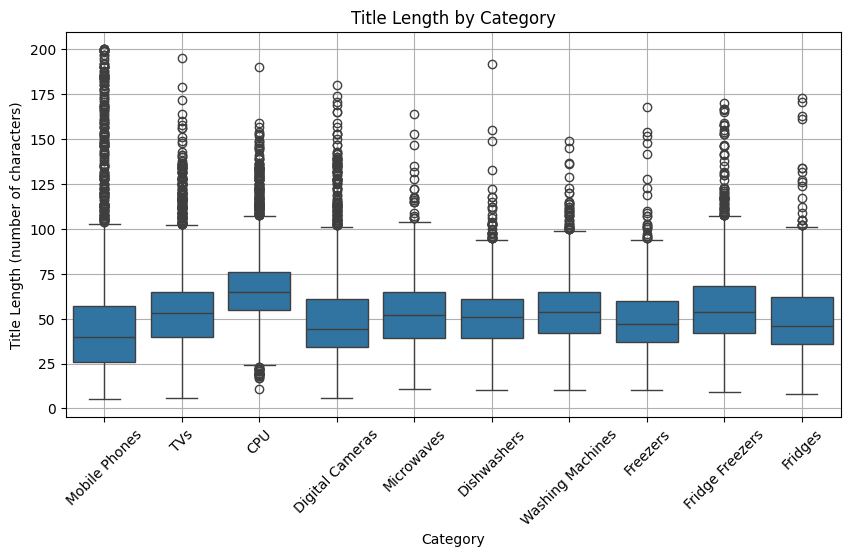

In [150]:
# Grupisemo po kategoriji i opisujemo osnovn ekarakteristike
print("Product title length statistics by category:")
print(df.groupby('Category Label', observed=False)['title_length'].describe())

# Vizualizacija
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category Label', y='title_length')
plt.title("Title Length by Category")
plt.xlabel("Category")
plt.ylabel("Title Length (number of characters)")

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Nakon analize dobijenih rezultata zakljucio sam da ove kolone nemaju prevelikog uticaja na tacnost modela kako se cinilo pre analize,jer se ne moze na osnovu tih karakteristika precizirati kategorija proizvoda.

In [151]:
df = df.drop(columns=['title_length', 'title_words'])
print(df.columns)

Index(['Product Title', 'Category Label'], dtype='object')


### Trening i poredjenje vise modela masinskog ucenja
U ovom delu analize,mi ce trenirati i razvijati nekoliko razlicitih modela masinskog ucenja kako bi pronasli najbolji za predikciju kategorija.
Proci cemo kroz sledece korake:
- Podelicemo podatke na *train* i *test*
- Definisacemo i trenirati nekoliko razlicitih algoritama
- Objedinicemo sve komponente u pipline
- Procenicemo performanse modela izvestajem o klasifikaciji


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

#Delimo podatke na ulazne i ciljanu promenljivu
X = df['Product Title']
y = df['Category Label']

#Sada delimo podatke na trening i test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
  print(f"\n {name}")
  pipeline = Pipeline([
      ("tfidf", TfidfVectorizer()),
      ("Classifier", model)
  ])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Na osnovu dobijenih rezultata i uporedjivanja istih na sve algoritme za treniranje iz datog skupa, *Support Vector Machine* je pokazao najbolje ukupne performanse,za samo 1% je bio bolji od LR. Ali posle vise testova i provera,**Logistic Regression** se pokazao kao bolji algoritam za predikcije kategorija i bice koriscen kao finalni algoritam u daljoj analizi.

Sazete performanse LR modela:

- Odlicna tacnost od 96%
- Visoke vrednosti f1-scora za svaku klasu
- Visoki i uravnotezeni rezultati za *precision* i *recall*
- Uravnotezeni rezultati po svim klasama